In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, multilabel_confusion_matrix, confusion_matrix
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


num_samples = 100000

YTest = np.zeros((num_samples, 7))
YTest[np.arange(num_samples), np.random.randint(0, 7, size=num_samples)] = 1

YPredicted = np.zeros((num_samples, 7))
YPredicted[np.arange(num_samples), np.random.randint(0, 7, size=num_samples)] = 1

In [2]:
labels = ['Bowens disease',
          'Basal cell carcinoma',
          'Benign keratosis',
          'Dermatofibroma',
          'Vascular lesion',
          'Melanoma',
          'Melanocytic nevi']

metrics = {
    'Precision': precision_score(YTest.argmax(axis=1), YPredicted.argmax(axis=1), average=None),
    'F1-score': f1_score(YTest.argmax(axis=1), YPredicted.argmax(axis=1), average=None),
    'ROC AUC': roc_auc_score(YTest, YPredicted, average=None),
    'Recall': recall_score(YTest.argmax(axis=1), YPredicted.argmax(axis=1), average=None)
}

cmMulti = multilabel_confusion_matrix(YTest.argmax(axis=1), YPredicted.argmax(axis=1))
specificity = []
for i in range(len(cmMulti)):
    tn = cmMulti[i][0][0]
    specificity.append(tn / (tn + cmMulti[i][0][1]))
metrics[f'Specificity'] = specificity
metrics[f'Confusion_Matrix'] = cmMulti

Text(0.5, 126.24999999999996, 'Predicted label')

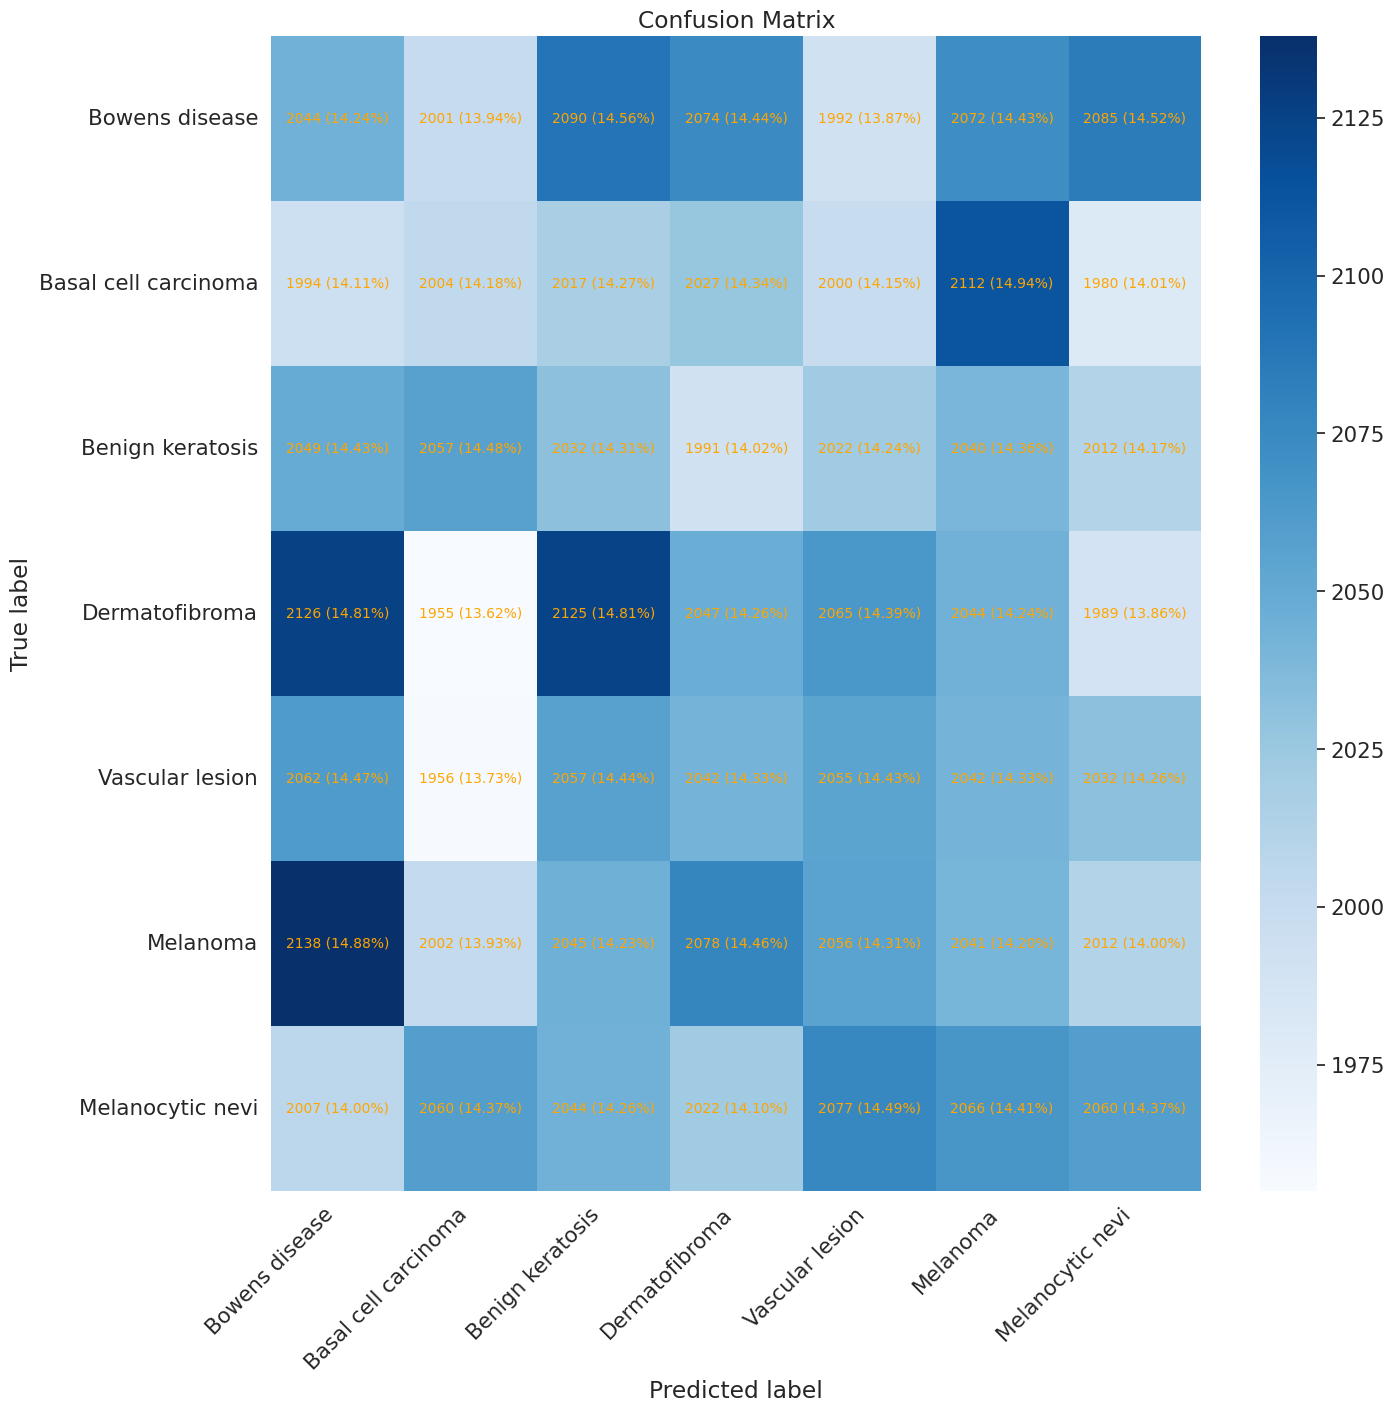

In [3]:
cm = confusion_matrix(YTest.argmax(axis = 1), YPredicted.argmax(axis = 1))

labels = ['Bowens disease',
          'Basal cell carcinoma',
          'Benign keratosis',
          'Dermatofibroma',
          'Vascular lesion',
          'Melanoma',
          'Melanocytic nevi']
dfCm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (15, 15))
sns.set(font_scale = 1.4) # Label size
sns.heatmap(dfCm, annot = False, cmap="Blues", annot_kws = {"size": 14}) # Font size
for i in range(7):
    for j in range(7):
        text = plt.text(j + 0.5, i + 0.5, f"{cm[i, j]:0d} ({cm[i, j] / cm[i].sum() * 100:.2f}%)", va="center", ha="center", color="orange", fontsize=10)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Precision:

       Label            Value  
      Bowens disease  0.141748 
Basal cell carcinoma  0.142786 
    Benign keratosis  0.141013 
      Dermatofibroma  0.143337 
     Vascular lesion  0.144039 
            Melanoma  0.141569 
    Melanocytic nevi  0.145378 


F1-score:

       Label            Value  
      Bowens disease  0.142053 
Basal cell carcinoma  0.142284 
    Benign keratosis  0.142033 
      Dermatofibroma  0.142987 
     Vascular lesion  0.144145 
            Melanoma  0.141790 
    Melanocytic nevi  0.144531 


ROC AUC:

       Label            Value  
      Bowens disease  0.498926 
Basal cell carcinoma  0.500836 
    Benign keratosis  0.499399 
      Dermatofibroma  0.499900 
     Vascular lesion  0.500922 
            Melanoma  0.498740 
    Melanocytic nevi  0.501164 


Recall:

       Label            Value  
      Bowens disease  0.142360 
Basal cell carcinoma  0.141786 
    Benign keratosis  0.143068 
      Dermatofibroma  0.142638 
     Vascular lesion  0.

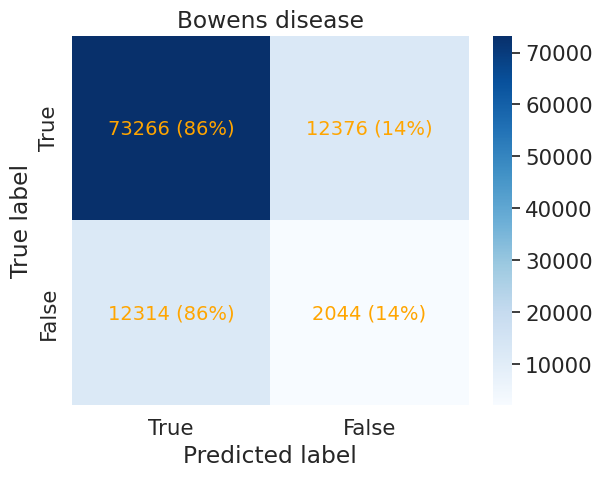

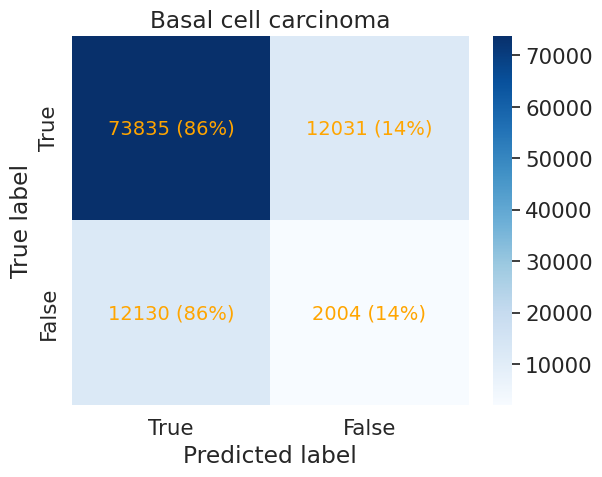

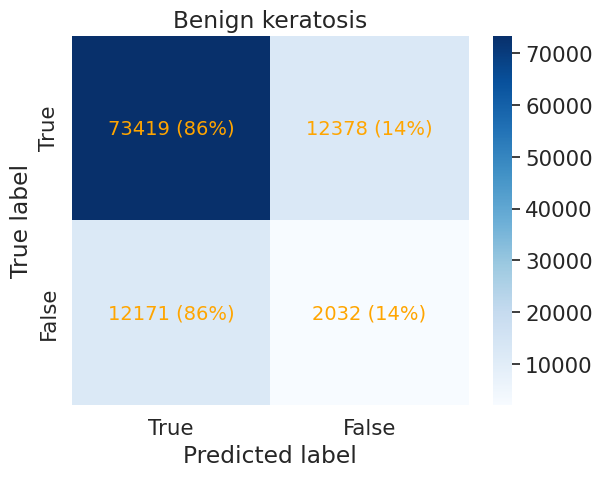

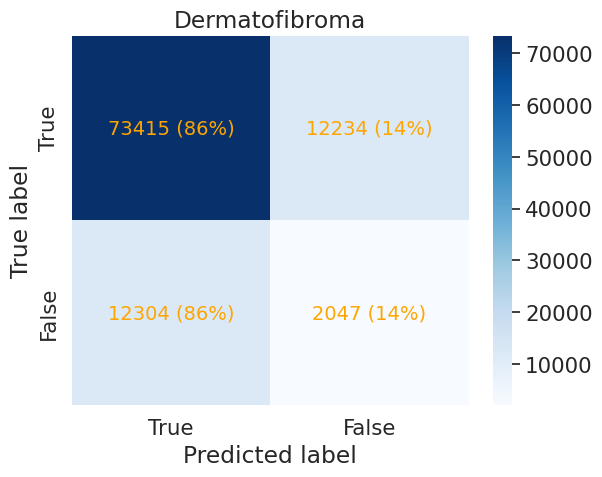

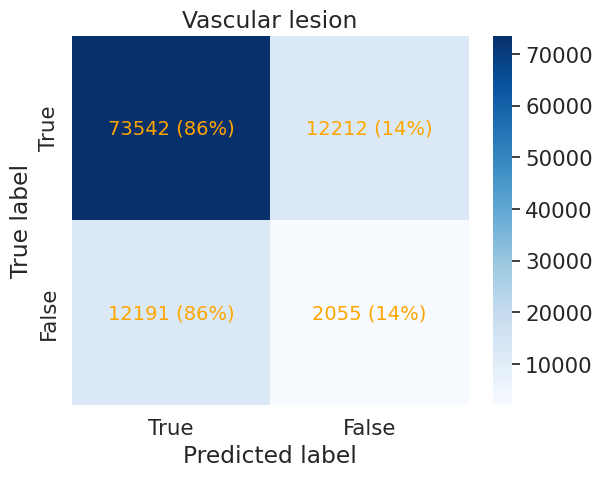

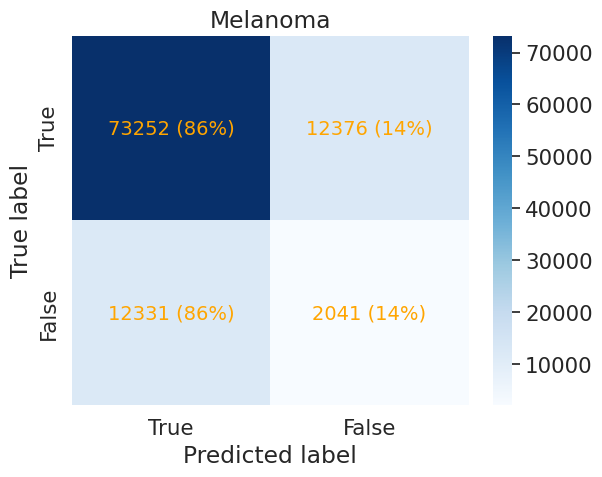

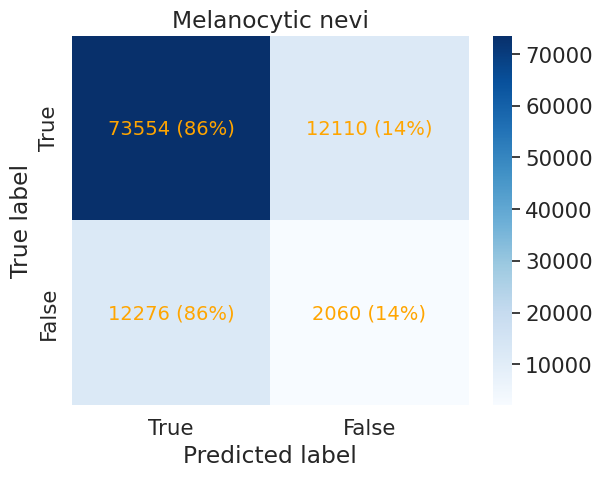

In [4]:
for metric, values in metrics.items():
    print(metric + ':\n')
    if 'Confusion_Matrix' in metric:
        for id, value in enumerate(values):
          sns.set(font_scale = 1.4) # Label size
          percentages = value / np.sum(value, axis=1, keepdims=True)
          sns.heatmap(value, annot=False, cmap="Blues")
          ax = plt.gca()
          for i in range(len(value)):
            for j in range(len(value)):
                ax.text(j + 0.5, i + 0.5, f'{value[i, j]:0d} ({percentages[i, j]*100:.0f}%)',
                        ha='center', va='center', color='orange', fontsize = 14)
          ax.set_yticklabels(['True', 'False'])
          ax.set_xticklabels(['True', 'False'])
          plt.title(f'{labels[id]}')
          plt.ylabel('True label')
          plt.xlabel('Predicted label')
          plt.show()
    else:
        for id, value in enumerate(values):
            df = pd.DataFrame({'Label': labels, 'Value': values})
        print(df.to_string(index=False, col_space=10, justify='center'))
    print('\n')

In [15]:
from sklearn.utils import class_weight

YTrain = np.zeros((num_samples, 7))
YTrain[np.arange(num_samples), np.random.randint(0, 7, size=num_samples)] = 1


class_frequencies = np.sum(YTrain, axis=0)

class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(np.argmax(YTrain, axis=1)), y=np.argmax(YTrain, axis=1))

class_weights_dict = dict(enumerate(class_weights))

print(class_weights)
print(YTrain.shape)

[1.00646148 0.99600602 1.00688711 0.98678692 1.00131172 0.99524274
 1.00766836]
(100000, 7)
